# Amazon Sales Data Analysis

Python * E-Commerce Sales Data Set, Amazon Sales Dataset

## Objective - Increase revenue and improve product category performance


Calculate the percentage of revenue for the top 3 product categories, and aim to increaase the percentage of revenue for the lowest of the top 3 categories by 5% by the end of the Q3 2022.
- reduce dependence on a single category



## Preliminary Analysis

Based on the analysis, we can draw some preliminary insights about the Q2 2022 performance of Amazon India:

* The total revenue for Q2 2022 decreased by -18.77% form April to June, with May revenue experiencing a -9.06% decrease form April, and June revenue seeing a -10.68% decrease from May, which is a cause of concern.

* The revenue is dominated by the product category "Set," which accounts for 49.88% of total revenue, followed by kurta with 27.09%, and Western Dress with 14.28%.

* The top 5 product categories by average price in dollars are Set ($9.43), Saree ($9.14), Western Dress ($8.75), Ethnic Dress ($8.26), and Top ($6.09), indicating that these products are high-value orders.

* The total number of cancelled and returned orders was 49,178, which represents 17.53% of all orders. Of these, 14.22% were cancelled and 1.64% were returned.

* The average order amount by customer type is $8.21 for business customers and $7.37 for regular customers.

* The most popular product category varies by state, and it may be worthwhile to analyze the reasons behind these trends and invest in marketing campaigns or promotion accordlingly.



## Analysis Summary and Recommendations


* Use promotions to drive interest in the Western Dress product by targeting the top 50% of states ranked by sales revenue since their revenue is between 10 and 100 times more than the top ranked states by revenue in the lower 50%.



## Implementation and Analysis of Strategies

* Work with the client to implement the following promotions:
    * Promotion to drive interest in the Western Dress category
* Monitor the Impact of Strategies
    * Track the sales revenue for Western Dress category after the promotions are implemented
* Analyze the Effectiveness of the Strategies
    * Conduct an analysis after the promotions have been running for some time



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('archive/Amazon Sale Report.csv', low_memory=False)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
df.nunique().to_frame(name='Count of Unique Values')

,Count of Unique Values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [5]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [7]:
df.describe(include='O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


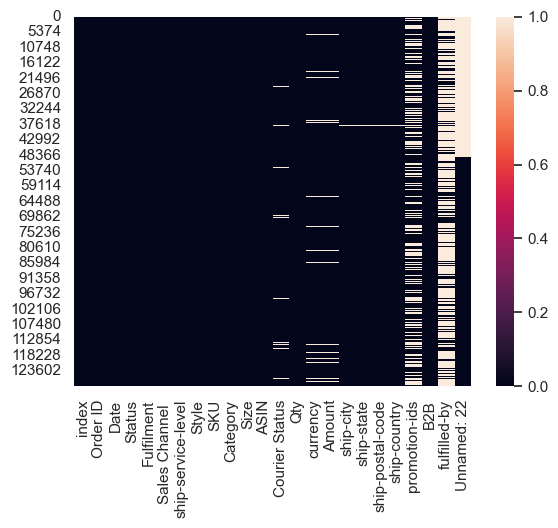

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

## Data Cleaning

### Dropping Columns

In [10]:
df.drop(columns = ['index', 'Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

## Dropping Duplicates

In [11]:
df[df.duplicated(['Order ID','ASIN'], keep=False)].count()

Order ID              14
Date                  14
Status                14
Fulfilment            14
ship-service-level    14
Style                 14
SKU                   14
Category              14
Size                  14
ASIN                  14
Courier Status        14
Qty                   14
Amount                 7
ship-city             14
ship-state            14
ship-postal-code      14
promotion-ids          8
B2B                   14
dtype: int64

In [12]:
df[df.duplicated(['Order ID', 'ASIN'],keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [13]:
len(df) - len(df.drop_duplicates(['Order ID', 'ASIN']))

7

In [14]:
df.drop_duplicates(['Order ID', 'ASIN'], inplace=True, ignore_index=True)

## Filling NaN Values

In [15]:
df['Courier Status'].fillna('unknown', inplace=True)

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/1374046707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna('unknown', inplace=True)


In [16]:
df['promotion-ids'].fillna('no promotion', inplace=True)

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/604700236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['promotion-ids'].fillna('no promotion', inplace=True)


In [17]:
df[df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [18]:
df[df['Amount'].isnull()]['Status'].value_counts()

Status
Cancelled                       7563
Shipped                          208
Shipped - Delivered to Buyer       8
Shipping                           8
Shipped - Returned to Seller       3
Pending                            2
Name: count, dtype: int64

In [19]:
df['Amount'].fillna(0, inplace=True)

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/4145947917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(0, inplace=True)


In [20]:
df['ship-city'].fillna('unknown', inplace=True)
df['ship-state'].fillna('unknown', inplace=True)
df['ship-postal-code'].fillna('unknown', inplace=True)

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/705246884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna('unknown', inplace=True)
/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/705246884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

## Renaming Columns

In [21]:
mapper = {
    'Order ID': 'order_ID', 'Date': 'date', 'Status': 'ship_status', 'Fulfillment': 'fulfillment',
    'ship-service-level': 'service_level', 'Style': 'style', 'SKU': 'sku', 'Category': 'product_category',
    'Size': 'size', 'ASIN': 'asin', 'Courier States': 'courier_ship_status', 'Qty': 'order_quantity',
    'Amount': 'order_amount_($)', 'ship-city': 'city', 'ship-state': 'state', 'ship-postal-code': 'zip',
    'promotion-ids': 'promotion', 'B2B': 'customer_type'  
}

In [22]:
df.rename(columns=mapper, inplace=True)

### Convert Amount column values to dollars

In [23]:
# Convert INR to USD using an exchange rate of 1 INR = 0.014 USD
exchange_rate = 0.0120988
df['order_amount_($)'] = df['order_amount_($)'].apply(lambda x: x*exchange_rate)

### Convert B2B column values

In [24]:
df['customer_type'].head()

0    False
1    False
2     True
3    False
4    False
Name: customer_type, dtype: bool

In [25]:
df['customer_type'].replace(to_replace=[True,False], value=['business','customer'], inplace=True)

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/481664588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_type'].replace(to_replace=[True,False], value=['business','customer'], inplace=True)


### Creating Datetime and adding Month Column

In [26]:
df['date'] = pd.to_datetime(df['date'])

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [27]:
# Filter only to include dates in March
march_dates = df['date'][df['date'].dt.month == 3]

# Get the number of unique days in March
march_dates.dt.day.nunique()

1

In [28]:
# dropping March dates from the dataset
df = df[(df['date'].dt.month != 3)]

In [29]:
df['month'] = df['date'].dt.month
df['month'].unique()

array([4, 5, 6], dtype=int32)

In [30]:
month_map = {4:'april',5:'may',6:'june'}
df['month'] = df['date'].dt.month.map(month_map)

In [31]:
# Define the desired order of months
month_order = ['april', 'may', 'june']

# Convert the month column to a categorical data type with the desired order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [32]:
print(f'This dataset contains the months {df["month"].unique()} for 2022')
print(f'The earliest date is {df["date"].min()}')
print(f'The latest date is {df["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


### Column Value Ordering

In [33]:
# Define the desired order for the 'size' column
size_order = ['Free', 'XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL','4XL','5XL','6XL']

# Create an ordered categorical variable for the 'size' column
df['size'] = pd.Categorical(df['size'], categories=size_order, ordered=True)

## Data Visualizations

### Checking the Clean Data

In [34]:
df.describe(include='all', datetime_is_numeric=True)

TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

In [35]:
#df['date_numeric'] = df['date'].astype('int64')  # Convert datetime to numeric (UNIX timestamp)
#df.describe(include='all')

df['datetime'] = pd.to_numeric(df['date'])
df.describe(include='all')


,order_ID,date,ship_status,Fulfilment,service_level,style,sku,product_category,size,asin,Courier Status,order_quantity,order_amount_($),city,state,zip,promotion,customer_type,month,datetime
count,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797.000000,128797.000000,128797,128797,128797.0,128797,128797,128797,1.287970e+05
unique,120220,NaN,13,2,2,1377,7194,9,11,7189,4,NaN,NaN,8953,70,9460.0,5784,2,3,NaN
top,171-5057375-2831560,NaN,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,no promotion,customer,april,NaN
freq,12,NaN,77664,89543,88460,4221,772,50206,22679,772,109331,NaN,NaN,11200,22235,1004.0,49088,127926,49065,NaN
mean,NaN,2022-05-12 13:11:06.099365632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904439,7.372913,NaN,NaN,NaN,NaN,NaN,NaN,1.652361e+18
min,NaN,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.648771e+18
25%,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.996804,NaN,NaN,NaN,NaN,NaN,NaN,1.650413e+18
50%,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.054084,NaN,NaN,NaN,NaN,NaN,NaN,1.652141e+18
75%,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.328175,NaN,NaN,NaN,NaN,NaN,NaN,1.654301e+18
max,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,67.559699,NaN,NaN,NaN,NaN,NaN,NaN,1.656461e+18


In [36]:
df.isnull().sum()

order_ID            0
date                0
ship_status         0
Fulfilment          0
service_level       0
style               0
sku                 0
product_category    0
size                0
asin                0
Courier Status      0
order_quantity      0
order_amount_($)    0
city                0
state               0
zip                 0
promotion           0
customer_type       0
month               0
datetime            0
dtype: int64

In [37]:
df.nunique().to_frame(name='Count of all unique values')

,Count of all unique values
order_ID,120220
date,90
ship_status,13
Fulfilment,2
service_level,2
style,1377
sku,7194
product_category,9
size,11
asin,7189


In [39]:
df.apply(pd.unique).to_frame(name='Unique values')

,Unique values
order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
ship_status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
service_level,"[Standard, Expedited]"
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
product_category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."
asin,"[B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7..."


## Preliminary Insights

In [40]:
revenue_by_month = df.groupby('month')['order_amount_($)'].sum()

/var/folders/pg/sqf9myss733_86tn8zcr1qtr0000gn/T/ipykernel_64637/2550969711.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_month = df.groupby('month')['order_amount_($)'].sum()


In [41]:
revenue_by_month

month
april    348913.764222
may      317285.195354
june     283410.111622
Name: order_amount_($), dtype: float64